# Problem Statement + EDA

The approach I plan to take with this data is to look for trends relating to the review counts of users and businesses and whether the magnitude of reviews affects their overall rating. I will use some data visualizations to look for more obvious trends and use a model to determine feature importance for the less obvious trends. I also believe I can determine relationships between the star rating a business got based on the sentiment in the review text.

Some risks I may face are the magnitude of the dataset as well as assuming ther reviews are consistent enough with sentimental words. There may also be difficulty of finding trends while using data from as many locations as is provided by Yelp. To combat that I will focus my studies on a small region. 


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To start I'll load the user dataset and the business dataset and I'll perform some basic EDA.

In [3]:
with open('/Users/lesliepham/Desktop/Capstone/Data/yelp_academic_dataset_user.json', 'rb') as f:
    data = f.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
user_df = pd.read_json(data_json_str)

In [4]:
with open('/Users/lesliepham/Desktop/Capstone/Data/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
business_df = pd.read_json(data_json_str)

The columns that interest me most are 'average_stars', 'fans', 'review_count' and 'yelping_since'. These values can be plotted to see any relationships. the 'compliments' and 'votes' must be iterated through, and separated into columns to analyze it better.  

In [5]:
user_df.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 280, u'cool': 245}",2004-10
1,3.66,"{u'profile': 116, u'cute': 206, u'funny': 580,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1179,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1274,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 7681, u'useful': 14199, u'cool': 11...",2004-10
2,3.60,"{u'profile': 9, u'cute': 23, u'funny': 120, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",100,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 908, u'useful': 1483, u'cool': 732}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],4,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 11, u'useful': 34, u'cool': 13}",2004-10


The 'yelping_since' column is a date but the data type is not datetime so we must change it in order to work with it as a time series.

In [7]:
user_df.dtypes

average_stars    float64
compliments       object
elite             object
fans               int64
friends           object
name              object
review_count       int64
type              object
user_id           object
votes             object
yelping_since     object
dtype: object

In [8]:
user_df['yelping_since']=pd.to_datetime(user_df['yelping_since'], format='%Y-%m')

In [9]:
users=pd.DataFrame(data=user_df,columns=['average_stars', 'fans', 'review_count', 'votes', 'yelping_since'])

From the pairplot we see that people with the most fans and people who have reviewed the most have an average_star value in the range of 3 to 4.5.

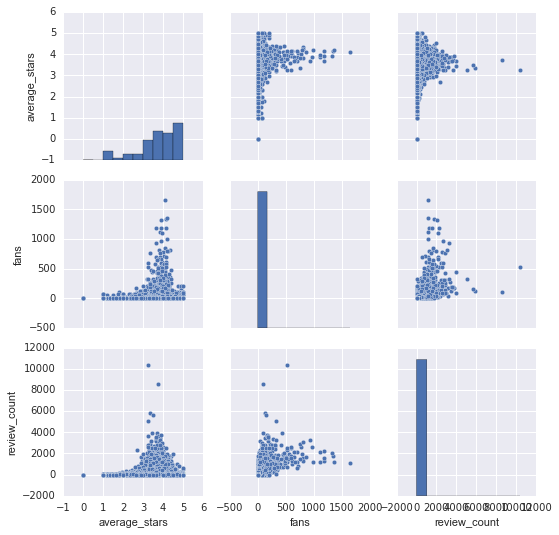

In [21]:
sns.pairplot(users)

In [11]:
complimentslst=[]
for i in user_df['compliments']:
    complimentslst.append(i)

compliments=pd.DataFrame(complimentslst)

fill_comp=compliments.fillna(value=0.0)
fill_comp.head()

,cool,cute,funny,hot,list,more,note,photos,plain,profile,writer
0,78.0,15.0,11.0,48.0,0.0,3.0,20.0,14.0,25.0,8.0,9.0
1,1642.0,206.0,580.0,1094.0,38.0,134.0,611.0,330.0,959.0,116.0,327.0
2,145.0,23.0,120.0,101.0,4.0,19.0,83.0,24.0,89.0,9.0,24.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0


In [12]:
Nevada= business_df[business_df['state']=='NV']
NVplot=pd.DataFrame(data=Nevada, columns=['latitude', 'longitude','name', 'review_count', 'stars'])

The histogram of the Nevada business data shows the same trend as the user data. The businesses with the most reviews are in the 3.5 to 4.5 range. 

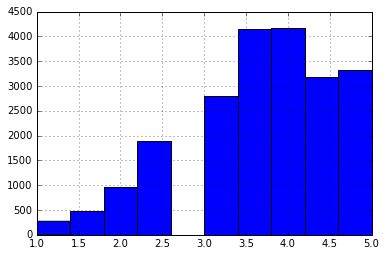

In [16]:
Nevada['stars'].hist()

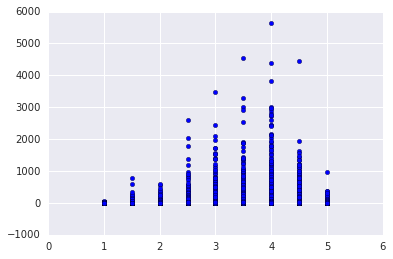

In [23]:
plt.scatter(data=NVplot, x='stars', y='review_count')